In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

import pandas as pd
import matplotlib.pyplot as plt
from Graph import *
from math import sqrt

## Test the Graph class

In [ ]:
vertex1 = Vertex(60, 2, 0)
vertex2 = Vertex(61, 3, 0)

edge = Edge([vertex1, vertex2])

print(edge.angle, edge.length, edge.intermediate_point())

In [ ]:
graph = Graph(warnings = True)

last_vertex = Vertex(-1, -1, 0, warnings = True)
graph.add_vertices(last_vertex)

for i in range(0,10):
    new_vertex = Vertex(i, i, 0, warnings = True)
    edge = Edge(vertices = [last_vertex, new_vertex], warnings = True)
    graph.add_vertices(new_vertex)
    last_vertex = new_vertex

In [ ]:
pp.pprint(graph.vertices)
pp.pprint(graph.edges)
    
for i in range(5):
    cur_vertex = next(iter(graph.vertices))
    cur_vertex.set_graph(None)

    pp.pprint(graph.vertices)
    pp.pprint(graph.edges)
    pp.pprint("")

In [39]:
print(calculate_angle(60, 61, 2, 3))
print(calculate_angle(60, 61, 3, 2))

346.10049260270813
13.89950739729187


## Angle graphifying

In [7]:
df = pd.read_csv("presets/0.csv")

In [8]:
tra = df["trajectory"].unique()[0]
dft = df[df["trajectory"] == tra]

In [ ]:
# Additional idea: combine edges with similar angles

### Testing division

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


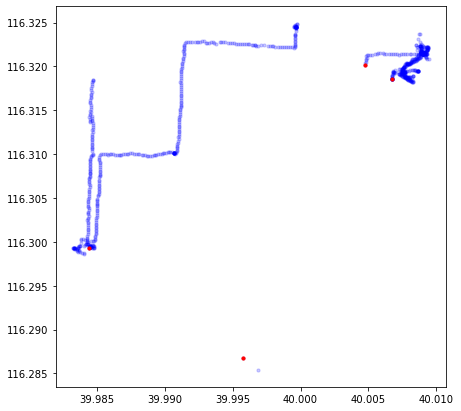

In [14]:
maximum = 0.0014
dft.loc[:, "latitude_change"] = dft.loc[:,"latitude"] - dft.loc[:,"latitude"].shift(1)
dft.loc[:, "longitude_change"] = dft.loc[:,"longitude"] - dft.loc[:,"longitude"].shift(1)

def pythago(lat, long):
    return sqrt(lat*lat + long*long)

dft.loc[:,["change"]] = dft.apply(lambda x: pythago(x.latitude_change, x.longitude_change), axis=1)

maximum = dft.loc[:,"change"].mean()*10
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(dft[dft["change"] > maximum].latitude, dft[dft["change"] > maximum].longitude, zorder=1, alpha=1, c='r', s=10)

### The actual graph

In [45]:
# Method 1: check if the angle between current and previous vertex is too different from first angle in sequence
# Method 2: check if the angle between current and first vertex in the sequence is too different from first angle in sequence
# Method 3: method 2, but the max angle is affected by the distance from the first vertex in the sequence

def create_graph(df, max_angle_change = 45, method = 3, max_angle_change_min = 5):
    mean_distance_change = df["change"].mean()

    graph = Graph()

    start_latitude = df.iloc[0, 0]
    start_longitude = df.iloc[0, 1]
    altitude = df.iloc[0, 2]

    last_vertex = Vertex(start_latitude, start_longitude, altitude, graph)
    last_latitude = df.iloc[1, 0]
    last_longitude = df.iloc[1, 1]
    last_altitude = df.iloc[1, 2]

    compare_angle = last_vertex.angle_to_point(last_latitude, last_longitude)

    for i in range(2,len(df)):
        cur_latitude = df.iloc[i, 0]
        cur_longitude = df.iloc[i, 1]   
        cur_altitude = df.iloc[i, 2]
        
        last_distance = sqrt(pow(last_latitude-cur_latitude, 2) + pow(last_longitude-cur_longitude,2))
        
        if method == 1:
            last_angle = calculate_angle(last_latitude, cur_latitude, last_longitude, cur_longitude)
            cur_angle = last_angle
            compare_angle = max_angle_change
        
        elif method == 2:
            start_angle = calculate_angle(start_latitude, cur_latitude, start_longitude, cur_longitude)
            cur_angle = start_angle
            compare_angle = max_angle_change
        
        elif method == 3:
            start_angle = calculate_angle(start_latitude, cur_latitude, start_longitude, cur_longitude)
            cur_angle = start_angle
            start_distance = sqrt(pow(start_latitude-cur_latitude, 2) + pow(start_longitude-cur_longitude,2))

            compare_angle = max(max_angle_change*mean_distance_change/start_distance, max_angle_change_min)
            print(compare_angle)

        if abs(compare_angle-cur_angle) > compare_angle: #min(abs(compare_angle-cur_angle),abs(compare_angle-cur_angle+360)) > compare_angle:
            new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
            Edge([last_vertex, new_vertex])

            compare_angle = cur_angle
            last_vertex = new_vertex
            
            start_altitude = last_altitude
            start_longitude = last_longitude

        last_latitude = cur_latitude
        last_longitude = cur_longitude
        last_altitude = cur_altitude

    new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
    Edge([last_vertex, new_vertex])
    
    return graph

119.2327642519433
41.10870852304829
21.22913854427728
15.314143196479673
14.863685172027918
15.90560468490598
16.952729552008588
19.437787692685898
21.458858193984096
19.29200237679045
19.894700509638067
20.735736323626544
18.28213445288824
19.504312452374084
21.09425439586667
18.00967174786913
16.021101916789526
14.60836915113998
20.8939457886388
23.271591919113828
18.06566792301385
16.812250075304053
17.991378771824575
16.598838258962033
18.33072044294625
15.266191118687496
17.300750501981984
20.085403576566613
20.24108646288167
18.506993109171248
18.786497015687317
18.38725356965752
19.919770466698473
22.016721386994195
19.62878901521699
18.712425265743853
19.231208722466743
18.660103860130505
19.238157796031356
22.091017697409303
22.734753634266923
20.391880171234515
21.697383647728486
23.10434822161075
21.18021977766437
23.77516669303375
23.549324459264636
16.49487552779838
19.767877992394467
36.50313489089965
37.67414053490881
32.144648112217816
26.586295091831865
21.634430097078

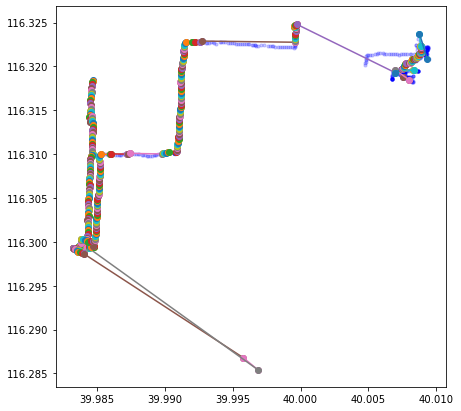

In [46]:
graph = create_graph(dft, method = 3)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

for edge in graph.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude
    
    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude
    
    plt.plot([lat1, lat2], [long1, long2], marker = 'o')
    

print(f"reduced from {len(dft)} to {len(graph.vertices)} points")

In [35]:

for vertex in graph.vertices:
    if len(vertex.edges) == 1:
        cur_vertex = vertex
        cur_edge = next(iter(vertex.edges))
        break
        
print(cur_edge.angle)   
cur_vertex = [vertex for vertex in cur_edge.vertices if vertex != cur_vertex][0]
cur_edge = [edge for edge in cur_vertex.edges if edge != cur_edge][0]

while len(cur_vertex.edges) != 1:
    print(cur_edge.angle)   
    cur_vertex = [vertex for vertex in cur_edge.vertices if vertex != cur_vertex][0]
    cur_edge = [edge for edge in cur_vertex.edges if edge != cur_edge][0]

282.86418417051453
280.3304670313938
267.0844312706888
273.54400209400353
0.7785028817315265
326.4368947270777
262.0461971421123
280.48720568173803
26.331437911942317
213.95431123855738
216.01088311007345
320.1036163664305
304.9295246719386
11.778384436832937
265.3654322511995
18.697503748694487
11.309474696358109
265.3609647866656
13.119918772360563
15.680687058165631
276.33161251491606
259.18940091482654
5.532089439242725
32.01151427968091
0.0
307.1261805101781
276.2970520461496
277.0732976457009
273.84819724244517
268.48988960600883
271.99479815537023
276.2882962133887
283.19949424588185
267.893638530726
253.73482653898571
280.7846528387584
276.14879519219613
285.2485907180569
270.77511886365056
268.66751262758487
274.1495379238812
278.3788905045351
279.2383055100182
261.24049505242544
273.6649694836427
266.3424677388623
255.39235650235497
269.09787187889725
275.5843574566752
322.9725906253759
0.0
0.14835929575275486
352.15611449350445
0.7626711207390713
357.99002423178155
0.6405930

IndexError: list index out of range

In [ ]:
# change gaps into different trajectory
# add distance to angle calculation